In [41]:
import pandas as pd
import datetime
import numpy as np
from decimal import *
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('dark_background')

In [42]:
file = pd.read_csv("new.csv")

In [43]:
file.result_type

0       RefreshHit
1            Error
2            Error
3            Error
4       RefreshHit
           ...    
1451         Error
1452         Error
1453         Error
1454         Error
1455         Error
Name: result_type, Length: 1456, dtype: object

In [44]:
file.columns


Index(['date', 'time', 'location', 'bytes', 'request_ip', 'method', 'host',
       'uri', 'status', 'referrer', 'user_agent', 'query_string', 'cookie',
       'result_type', 'request_id', 'host_header', 'request_protocol',
       'request_bytes', 'time_taken', 'xforwarded_for', 'ssl_protocol',
       'ssl_cipher', 'response_result_type', 'http_version', 'fle_status',
       'fle_encrypted_fields', 'c_port', 'time_to_first_byte',
       'x_edge_detailed_result_type', 'sc_content_type', 'sc_content_len',
       'sc_range_start', 'sc_range_end'],
      dtype='object')

In [45]:
refined = file[["date","time","location","bytes","request_ip","uri","user_agent","request_id","result_type","method"]].dropna()

In [46]:
refined.index = pd.to_datetime(refined["date"] +" "+ refined["time"])

In [47]:
done = refined.drop(columns=["date","time"])

<Axes: >

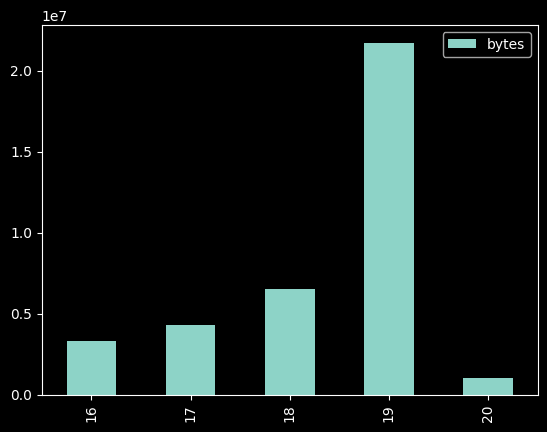

In [48]:
done.groupby(done.index.day).aggregate({"bytes":"sum"}).plot.bar()

In [55]:
correct = done.loc[(done.index >= "2023-03-19 00:00:00") & (done.index < "2023-03-19 14:00:00")]

In [61]:
who_is = correct[correct["location"] == "IAD55-P4"].drop(columns=["request_id"])

In [72]:
who_is.groupby("request_ip").aggregate({"bytes":"sum"}).sort_values("bytes")

,bytes
request_ip,
205.169.39.104,359222.0
65.154.226.169,957789.0
65.154.226.166,957816.0
205.169.39.135,1317058.0
65.154.226.167,1795424.0
65.154.226.170,2873359.0


In [77]:
bot_string = "(?i)curl|python|apache-http|go-http|webtech|-|insomnia|google|msnbot|wget|ioncrawl|java|xpanse|zoom|screaming|crawler"
without_bot = wut[wut['user_agent'].str.contains(bot_string) == False]